Mean Squared Error (MSE): 25215059.60
Mean Absolute Error (MAE): 1606.22
R^2 Score: 0.59


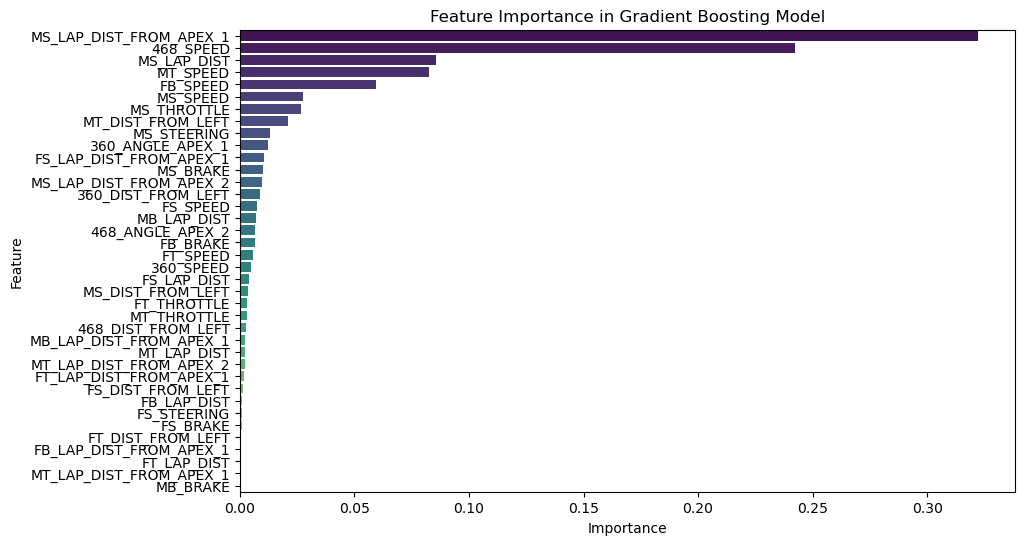

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Prepare the Data
data = pd.read_csv('data_new.csv')

# Define the target and features
target = 'SECTION_TIME_MS'
features = ['FB_BRAKE', 'MB_BRAKE', 'FT_THROTTLE', 'MT_THROTTLE', 'FS_STEERING', 'FS_BRAKE', 'MS_STEERING', 'MS_BRAKE', 'MS_THROTTLE',
    'FB_SPEED', 'FT_SPEED', 'MT_SPEED', 'FS_SPEED', 'MS_SPEED',
    'FS_DIST_FROM_LEFT', 'FT_DIST_FROM_LEFT', 'MS_DIST_FROM_LEFT', 'MT_DIST_FROM_LEFT', '360_DIST_FROM_LEFT',
    '360_ANGLE_APEX_1', '360_SPEED', '468_DIST_FROM_LEFT', '468_ANGLE_APEX_2', '468_SPEED',
    'FB_LAP_DIST', 'MB_LAP_DIST', 'FS_LAP_DIST', 'MS_LAP_DIST', 'FT_LAP_DIST', 'MT_LAP_DIST',
   'FB_LAP_DIST_FROM_APEX_1', 'FS_LAP_DIST_FROM_APEX_1', 'FT_LAP_DIST_FROM_APEX_1', 'MS_LAP_DIST_FROM_APEX_1',
           'MS_LAP_DIST_FROM_APEX_2', 'MB_LAP_DIST_FROM_APEX_1', 'MT_LAP_DIST_FROM_APEX_1', 'MT_LAP_DIST_FROM_APEX_2']

X = data[features]
y = data[target]

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict and Evaluate the Model
y_pred = gbr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Feature Importance
# Plot feature importance to see which factors impact SECTION_TIME_MS the most
feature_importance = gbr.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Mean Squared Error (MSE): 42614343.73
Mean Absolute Error (MAE): 2171.66
R^2 Score: 0.39


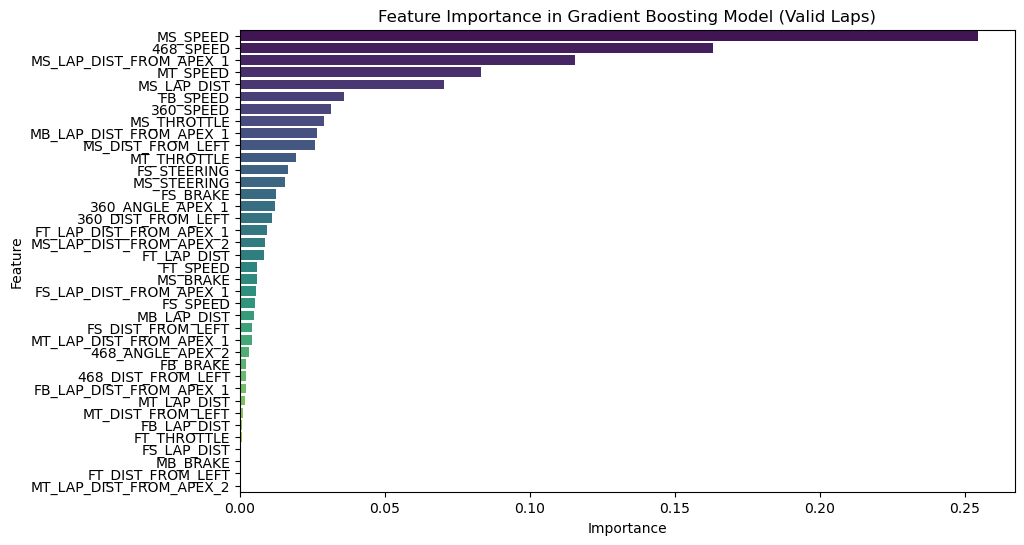

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Prepare the Data
data = pd.read_csv('data_new.csv')

# Filter for invalid rows
data = data[data['INVALID_LAP'] == 1]

# Define the target and features
target = 'SECTION_TIME_MS'
features = ['FB_BRAKE', 'MB_BRAKE', 'FT_THROTTLE', 'MT_THROTTLE', 'FS_STEERING', 'FS_BRAKE', 'MS_STEERING', 'MS_BRAKE', 'MS_THROTTLE',
    'FB_SPEED', 'FT_SPEED', 'MT_SPEED', 'FS_SPEED', 'MS_SPEED',
    'FS_DIST_FROM_LEFT', 'FT_DIST_FROM_LEFT', 'MS_DIST_FROM_LEFT', 'MT_DIST_FROM_LEFT', '360_DIST_FROM_LEFT',
    '360_ANGLE_APEX_1', '360_SPEED', '468_DIST_FROM_LEFT', '468_ANGLE_APEX_2', '468_SPEED',
    'FB_LAP_DIST', 'MB_LAP_DIST', 'FS_LAP_DIST', 'MS_LAP_DIST', 'FT_LAP_DIST', 'MT_LAP_DIST',
   'FB_LAP_DIST_FROM_APEX_1', 'FS_LAP_DIST_FROM_APEX_1', 'FT_LAP_DIST_FROM_APEX_1', 'MS_LAP_DIST_FROM_APEX_1',
           'MS_LAP_DIST_FROM_APEX_2', 'MB_LAP_DIST_FROM_APEX_1', 'MT_LAP_DIST_FROM_APEX_1', 'MT_LAP_DIST_FROM_APEX_2']

X = data[features]
y = data[target]

# Standardize features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict and Evaluate the Model
y_pred = gbr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Feature Importance
# Plot feature importance to see which factors impact SECTION_TIME_MS the most
feature_importance = gbr.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Gradient Boosting Model (Valid Laps)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()